In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [27]:
train_dataset_dir = 'Data/train/'
test_dataset_dir = 'Data/test/'

In [28]:
picture_size = 48
batch_size  = 128
folder_path = "./Data/"

In [29]:
datagen_train  = ImageDataGenerator(rescale = 1.0/255.0)
datagen_val = ImageDataGenerator(rescale = 1.0/255.0)

In [30]:
train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

Found 57529 images belonging to 7 classes.


In [31]:
test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 7178 images belonging to 7 classes.


In [32]:
no_of_classes = 7

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.3))

model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.3))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

In [35]:
model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))


model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))


model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

In [36]:
model.add(Dense(no_of_classes, activation='softmax'))

In [37]:
opt = Adam(learning_rate = 0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_7 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 


 dropout_7 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_8 (Bat  (None, 24, 24, 128)       512       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 24, 24, 128)       0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 512)       590336    
          

In [38]:
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [39]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

In [40]:
callbacks_list = [early_stopping,checkpoint]
epochs = 50
model.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.01),metrics=['accuracy'])

In [41]:
history = model.fit(train_set,steps_per_epoch=train_set.n//train_set.batch_size,epochs=epochs,validation_data = test_set,validation_steps = test_set.n//test_set.batch_size,callbacks=callbacks_list)

Epoch 1/50


449/449 [==============================] - 1887s 4s/step - loss: 1.7710 - accuracy: 0.3102 - val_loss: 1.7931 - val_accuracy: 0.2981
Epoch 2/50
449/449 [==============================] - 1629s 4s/step - loss: 1.3557 - accuracy: 0.4796 - val_loss: 1.4839 - val_accuracy: 0.4208
Epoch 3/50
449/449 [==============================] - 1646s 4s/step - loss: 1.2005 - accuracy: 0.5433 - val_loss: 1.3243 - val_accuracy: 0.4937
Epoch 4/50
449/449 [==============================] - 1929s 4s/step - loss: 1.1079 - accuracy: 0.5821 - val_loss: 1.3273 - val_accuracy: 0.4989
Epoch 5/50
449/449 [==============================] - 1581s 4s/step - loss: 1.0438 - accuracy: 0.6066 - val_loss: 1.1728 - val_accuracy: 0.5527
Epoch 6/50
449/449 [==============================] - 1778s 4s/step - loss: 0.9764 - accuracy: 0.6372 - val_loss: 0.9947 - val_accuracy: 0.6236
Epoch 7/50
449/449 [==============================] - 1829s 4s/step - loss: 0.9211 - accuracy: 0.6593 - val_loss: 0.9634 - val_accuracy: 0.6300
Epo

In [42]:
model.save("model_em3.h5")

c:\Users\koush\anaconda3\envs\master\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
loaded_model = tf.keras.models.load_model("model_em3.h5")

In [85]:
import cv2

In [94]:
frame = cv2.imread("./Data/test/surprise/PrivateTest_10072988.jpg",0)

In [95]:
frame.shape

(48, 48)

In [96]:
frame = frame/255.0

In [97]:
loaded_model.predict(np.array([frame]))

1/1 [==============================] - 0s 30ms/step


array([[1.45869125e-02, 1.61199918e-04, 1.63090110e-01, 8.56211316e-03,
        6.81932317e-03, 5.91014512e-03, 8.00870240e-01]], dtype=float32)

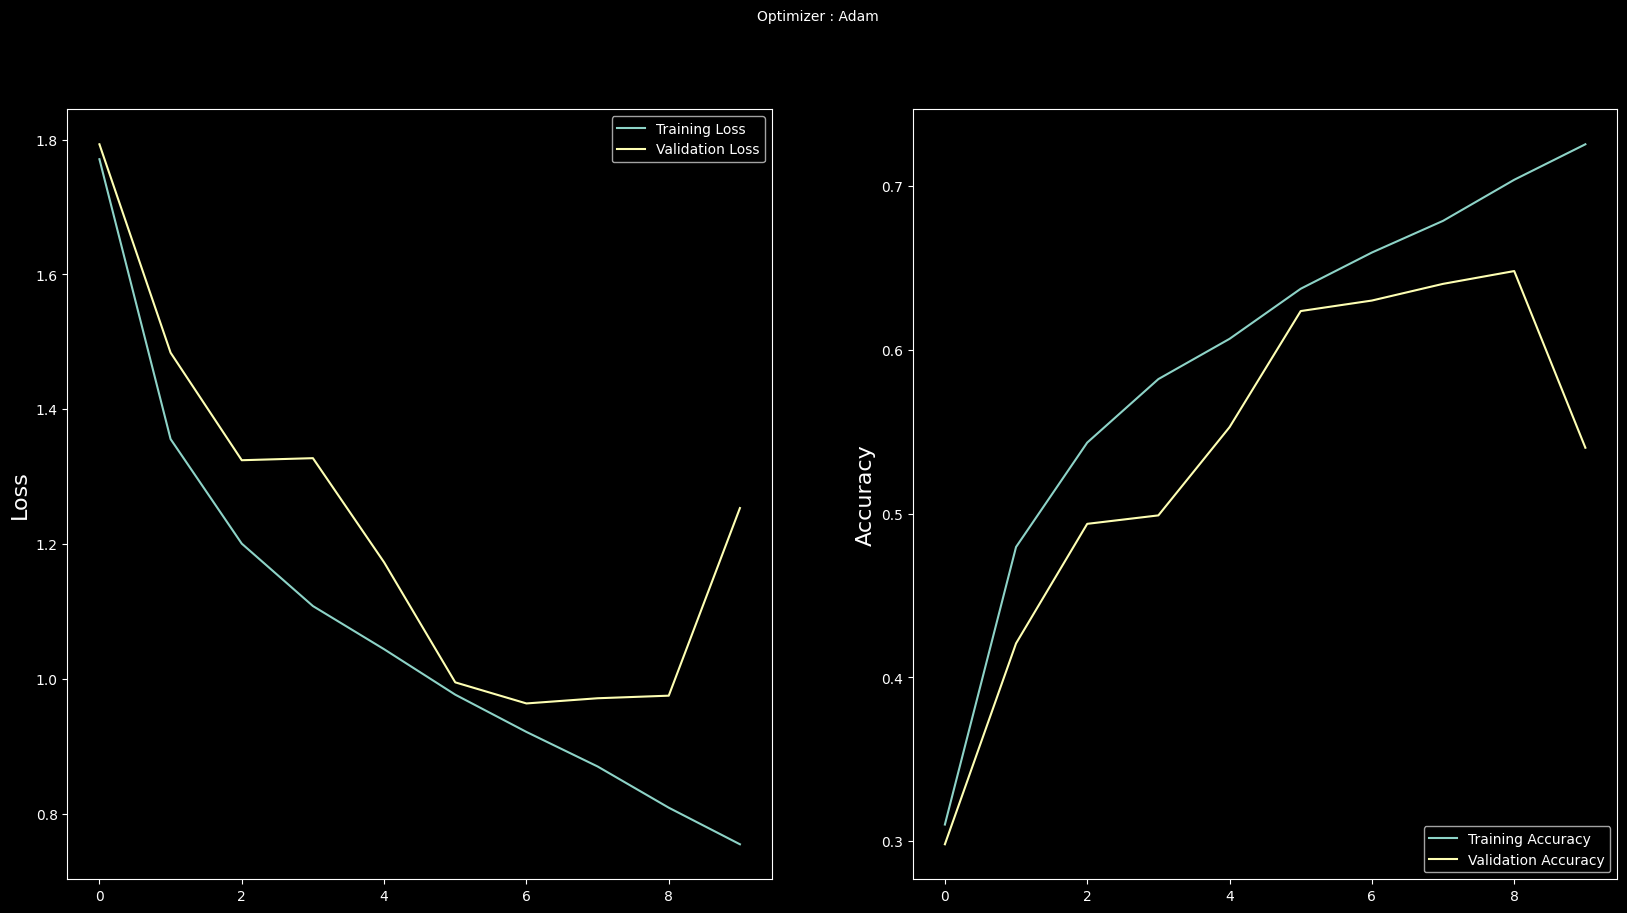

In [63]:
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()